In [94]:
from pylab import *
import matplotlib.pylab as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib import rc


font = {'family' : 'serif',
        'serif': ['Computer Modern'],
        'weight' : 'bold',
        'size'   : 28}

rc('font', **font)
rc('text', usetex=True)

In [95]:
name_array = "18x18_pump_x/array_18x18.xyz"
epsi = 0.0
x,y,f,d = np.loadtxt(name_array,usecols=(1,2,4,5),skiprows=2,unpack=True)
ind = np.argsort(f)
natoms = int( len(x) )

In [96]:
#random matrix
def M_Rand(natoms=natoms):
    M_rand = rand(natoms,natoms)
    M_ones = ones((natoms,natoms))

    M_rand = (M_rand + M_rand.T)/2
    M_rand = 2*M_rand - M_ones

    M_mins = diag(ones(natoms))

    M_rand = M_rand - M_mins*M_rand
    return M_rand


In [97]:
M_rand = M_Rand()
def Hoti_Hamiltonian(γ, λ, ϵ=epsi,δ=0.0, natoms=natoms, M_rand=M_rand,x=x,y=y):
    r = 1.1
    Dic = {}
    natoms = int( len(x) )
    for n in range(natoms):
        a = sqrt( (x[n]-x)*(x[n]-x) + (y[n]-y)*(y[n]-y) ) < r 
        vecinos = [i for i, x in enumerate(a) if x and i!=n]
        Dic[n] = vecinos
        
    r = max(x) - 0.1
    Dic_further = {}
    Dic_furtherx = {}
    Dic_furthery = {}
    for n in range(natoms):
        a = sqrt( (x[n]-x)*(x[n]-x) + (y[n]-y)*(y[n]-y) ) > r
        vecinos  = [i for i, j in enumerate(a) if j and (x[n]==x[i] and y[n]==y[i])]
        vecinosx = [i for i, j in enumerate(a) if j and (x[n]==x[i])]
        vecinosy = [i for i, j in enumerate(a) if j and (y[n]==y[i])]
        Dic_further[n] = vecinos
        Dic_furtherx[n] = vecinosx
        Dic_furthery[n] = vecinosy
    
    
    H = np.zeros((natoms,natoms), dtype = 'complex')
    Hop = {}
    a = exp(-1J*pi)
    
    for n in Dic.keys():
        vecinos = Dic[n]
        hop = []
        for v in vecinos:
            f0 = f[n]
            f1 = f[v]
            
            if f0 == f1:
                fase = γ
            else: 
                fase = λ
            
            H[n,v] = fase 
            H[v,n] = fase 
            
            
            hop.append(fase)
        Hop[n] = hop

    f0 = 0
    f1 = 0
    fase = 1
    for n in Dic.keys():
        vecinos = Dic[n]
        for v in vecinos:
            posx     = x[n]
            posy     = y[n]
            f0       = f[n]
            f1       = f[v] 
            if f0 == f1:
                fase = γ
            else: 
                fase = λ
                
            if ( posy%2==0  ):
                  if ( x[v] > x[n] ):
                    H[n,v] = a*fase 
                    H[v,n] = a*fase 
           
            else:
                pass

                
    H_delta = δ*array(d)
    H_delta = diag(resize(H_delta,natoms), k=0)
    #print(H_delta)
    if ϵ > 0.0:
        H_rand = H * ϵ * M_rand 
        return H + H_rand + H_delta
    else:    
        return H + H_delta

162.0

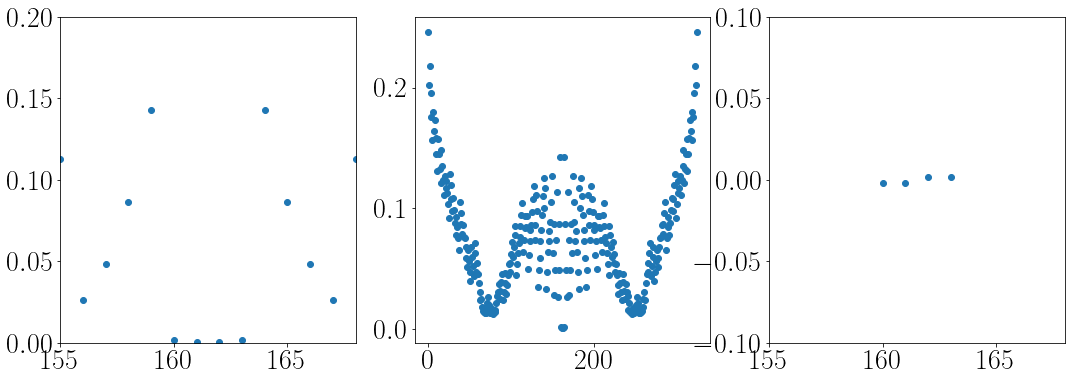

In [98]:
H0 = Hoti_Hamiltonian(0.5,1,ϵ=0.0)
Ek0, U0 = eigh(H0)
Ek0 = np.real(Ek0)
indexsort = argsort(Ek0)

fig,ax = plt.subplots(1,3,figsize=(18,6)) 

H = Hoti_Hamiltonian(0.5,1,ϵ=0.5)
Ek, U = eigh(H)
Ek = np.real(Ek)

Ey = abs(Ek0[indexsort] - Ek[indexsort])


for i in range(49):
    M_rand1 = M_Rand(natoms=natoms)
    H1 = Hoti_Hamiltonian(0.5,1,ϵ=0.5,M_rand=M_rand1)
    Ek1, U1 = eigh(H1)
    Ek1 = np.real(Ek1)

    Ey1 = abs(Ek0[indexsort] - Ek1[indexsort])
    Ey += Ey1

ax[0].scatter(range(len(Ey)),Ey/50)

ax[0].set_xlim(155,168)
ax[0].set_ylim(0,0.2)


ax[1].scatter(range(len(Ey)),Ey/50)

ax[2].scatter(range(len(Ey)),Ek0[indexsort]) 
ax[2].set_xlim(155,168)
ax[2].set_ylim(-0.1,0.1)


len(Ey)/2

128.0

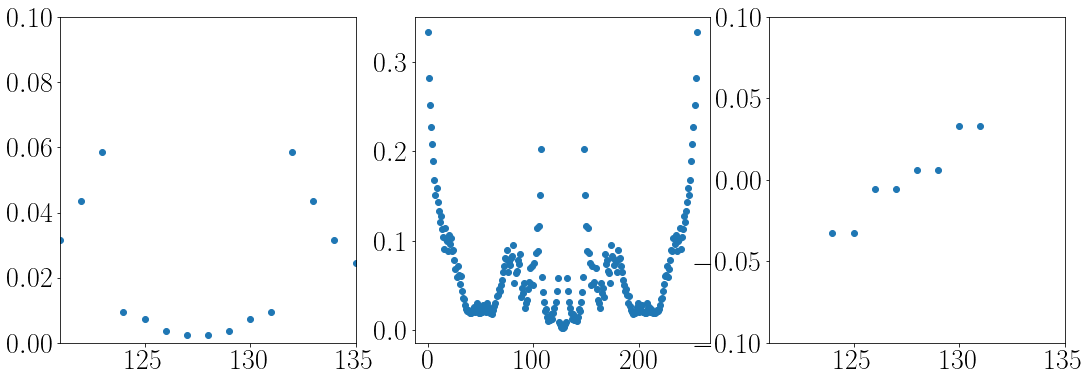

In [99]:
name_array = "../Hoti_variaciones_Fractal/18x18_pump_x/LatticeSierpinski_18x18.xyz"
x,y,f,d = np.loadtxt(name_array,usecols=(1,2,4,5),skiprows=2,unpack=True)
natoms = int( len(x) )
M_rand = M_Rand(natoms=natoms)
H0 = Hoti_Hamiltonian(0.3,1,ϵ=0.0,x=x,y=y,M_rand=M_rand)
Ek0, U0 = eigh(H0)
Ek0 = np.real(Ek0)
indexsort = argsort(Ek0)

fig,ax = plt.subplots(1,3,figsize=(18,6)) 

H = Hoti_Hamiltonian(0.5,1,ϵ=0.5,x=x,y=y,M_rand=M_rand)
Ek, U = eigh(H)
Ek = np.real(Ek)

Ey = abs(Ek0[indexsort] - Ek[indexsort])


for i in range(49):
    M_rand1 = M_Rand(natoms=natoms)
    H1 = Hoti_Hamiltonian(0.3,1,ϵ=0.5,M_rand=M_rand1,x=x,y=y)
    Ek1, U1 = eigh(H1)
    Ek1 = np.real(Ek1)

    Ey1 = abs(Ek0[indexsort] - Ek1[indexsort])
    Ey += Ey1

ax[0].scatter(range(len(Ey)),Ey/50)

ax[0].set_xlim(121,135)

ax[0].set_ylim(0,0.1)

ax[1].scatter(range(len(Ey)),Ey/50)

ax[2].scatter(range(len(Ey)),Ek0[indexsort]) 
ax[2].set_xlim(121,135)
ax[2].set_ylim(-0.1,0.1)


len(Ey)/2

In [100]:
name_array = "../Hoti_variaciones_Fractal/18x18_pump_x/LatticeSierpinski_54x54.xyz"
x,y,f,d = np.loadtxt(name_array,usecols=(1,2,4,5),skiprows=2,unpack=True)
natoms = int( len(x) )
M_rand = M_Rand(natoms=natoms)
H0 = Hoti_Hamiltonian(0.3,1,ϵ=0.0,x=x,y=y,M_rand=M_rand)
Ek0, U0 = eigh(H0)
Ek0 = np.real(Ek0)
indexsort = argsort(Ek0)


H = Hoti_Hamiltonian(0.5,1,ϵ=0.5,x=x,y=y,M_rand=M_rand)
Ek, U = eigh(H)
Ek = np.real(Ek)

Ey = abs(Ek0[indexsort] - Ek[indexsort])


for i in range(21):
    M_rand1 = M_Rand(natoms=natoms)
    H1 = Hoti_Hamiltonian(0.3,1,ϵ=0.5,M_rand=M_rand1,x=x,y=y)
    Ek1, U1 = eigh(H1)
    Ek1 = np.real(Ek1)

    Ey1 = abs(Ek0[indexsort] - Ek1[indexsort])
    Ey += Ey1

1024.0

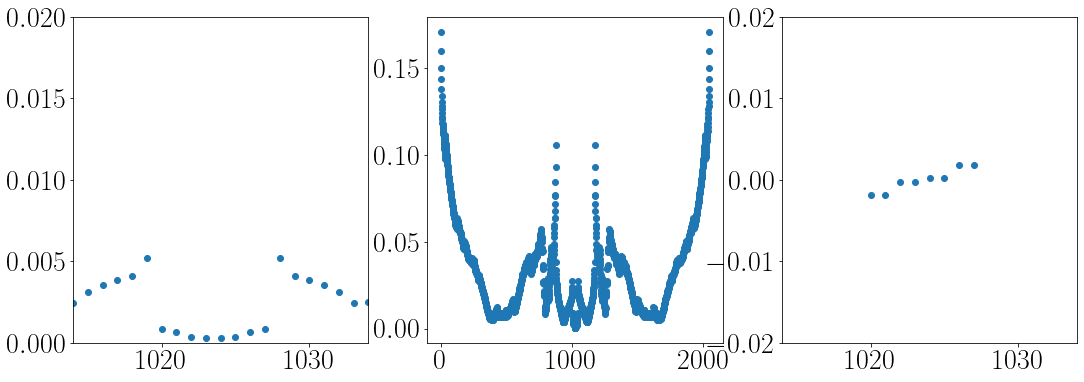

In [101]:
fig,ax = plt.subplots(1,3,figsize=(18,6)) 

ax[0].scatter(range(len(Ey)),Ey/50)

ax[0].set_xlim(1014,1034)
ax[0].set_ylim(0.0,0.02)


ax[1].scatter(range(len(Ey)),Ey/50)

ax[2].scatter(range(len(Ey)),Ek0[indexsort]) 
ax[2].set_xlim(1014,1034)
ax[2].set_ylim(-0.02,0.02)

len(Ey)/2